In [1]:
import pandas as pd
import numpy as np
from pckgs.headline_preprocess import HeadlinePreprocess
%load_ext autoreload
%autoreload 2
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.preprocessing import MinMaxScaler

In [2]:
# df = pd.read_csv('../datasets/223k crypto news headlines. Dataset. BDCenter Digital.csv', header=0)
# df = HeadlinePreprocess.preprocess(df)
# df.drop(['date'], inplace=True, axis=1)
# df.text = df.text.map(lambda p: p+' .')
# print(df.head())
# # np.savetxt('../datasets/headlines_clean.txt', df.values, fmt='%s')

In [ ]:
# df = pd.read_csv('../datasets/output/headline_sentiment.csv')
# df2 = pd.read_csv('../datasets/223k crypto news headlines. Dataset. BDCenter Digital.csv', header=0, usecols=[0])
# df2['publishdate'] = df2['publishdate'].map(lambda p: datetime.strptime(str(p), '%Y%m%d'))
# df2.rename(columns={'publishdate':'date'}, inplace=True)
# df.index = df2['date']
# df.head()
# # df.to_csv('../datasets/headline_sentiment.csv')

In [69]:
df = pd.read_csv('../datasets/headline_sentiment.csv', header=0, parse_dates=['date'], index_col=['date'])

count_total = df.resample('D').count().fillna(0).iloc[:,0]
print(count_total)

import plotly.express as px
df_pos = df.loc[df.prediction == 'positive']
count_pos = pd.DataFrame(df_pos.resample('D').count().fillna(0).iloc[:,0] / count_total)
count_pos.rename(columns={'sentence':'counts_pos'}, inplace=True)
count_pos.fillna(0, inplace=True)
print(count_pos)

df_neg = df.loc[df.prediction == 'negative']
count_neg = pd.DataFrame(df_neg.resample('D').count().fillna(0).iloc[:,0] / count_total)
count_neg.rename(columns={'sentence':'counts_neg'}, inplace=True)
count_neg.fillna(0, inplace=True)
print(count_neg)



date
2013-04-01      2
2013-04-02      0
2013-04-03      0
2013-04-04      0
2013-04-05      1
             ... 
2019-12-27    106
2019-12-28     68
2019-12-29     66
2019-12-30    118
2019-12-31     86
Freq: D, Name: sentence, Length: 2466, dtype: int64
            counts_pos
date                  
2013-04-01    0.000000
2013-04-02    0.000000
2013-04-03    0.000000
2013-04-04    0.000000
2013-04-05    0.000000
...                ...
2019-12-27    0.150943
2019-12-28    0.279412
2019-12-29    0.333333
2019-12-30    0.237288
2019-12-31    0.174419

[2466 rows x 1 columns]
            counts_neg
date                  
2013-04-01    0.000000
2013-04-02    0.000000
2013-04-03    0.000000
2013-04-04    0.000000
2013-04-05    0.000000
...                ...
2019-12-27    0.311321
2019-12-28    0.264706
2019-12-29    0.196970
2019-12-30    0.254237
2019-12-31    0.302326

[2466 rows x 1 columns]


In [ ]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
# mdates.AutoDateFormatter
plt.figure(figsize=(30,10))
ax = plt.subplot(111)
# ax = sb.barplot(data=count_pos, x=count_pos.index.strftime('%Y-%m-%d'), y='counts')
# ax.xaxis.set_major_locator(years)
plt.bar(count_pos.index.strftime('%Y-%m-%d'), count_pos.counts_pos, color='b', width=2)
plt.bar(count_neg.index.strftime('%Y-%m-%d'), count_neg.counts_neg, bottom=count_pos.counts_pos, color='r', width=2)
ax.xaxis.set_major_locator(years)

plt.show()

In [70]:
count_both = pd.concat([count_pos, count_neg], axis=1)
count_both

count_both.to_csv('../datasets/headline_sentiment_count.csv')

In [52]:
scaler = MinMaxScaler(feature_range=(0,1))

df = pd.read_csv('../datasets/headline_sentiment.csv', header=0, parse_dates=['date'], index_col=['date'])
# count = df.resample('D').count().fillna(0).iloc[:,0]
# df = df.loc[df.prediction != 'neutral']
df = df.resample('D').mean().ffill().bfill() ###only this
df = df.loc[(df.index >= datetime(2016, 1, 1, 00, 00, 00))]

# df = pd.concat([df, count], axis=1)
# df.rename(columns={'sentence':'total'}, inplace=True)
# df.total = scaler.fit_transform(df.total.values.reshape(-1,1))
df
# df

,sentiment_score
date,
2016-01-01,-0.189942
2016-01-02,0.140467
2016-01-03,-0.021164
2016-01-04,-0.272569
2016-01-05,0.120624
...,...
2019-12-27,-0.084293
2019-12-28,0.030249
2019-12-29,0.088101


<AxesSubplot:xlabel='date'>

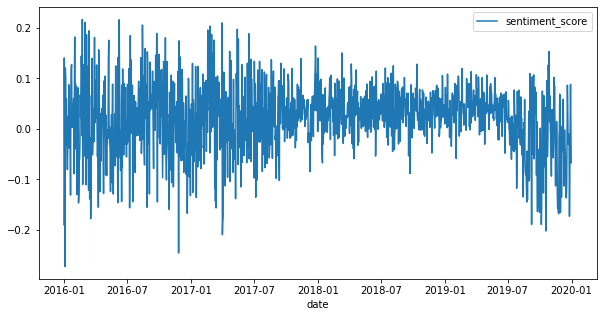

In [53]:
plt.figure(figsize=(10,5))
sb.lineplot(data=df)

In [54]:
df.to_csv('../datasets/headline_sentiment_mean.csv')
# count_both.to_csv('../datasets/headline_sentiment_counts.csv')

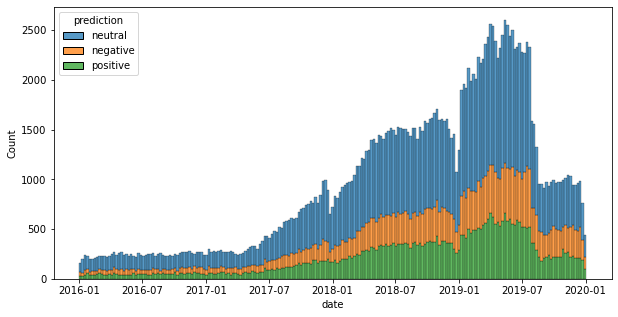

In [48]:
#see number of headlines per day
temp = pd.read_csv('../datasets/headline_sentiment.csv', header=0, parse_dates=['date'], index_col=['date'])
temp = temp.loc[(temp.index >= datetime(2016, 1, 1, 00, 00, 00))]
# temp = temp.loc[temp.prediction != 'neutral']

plt.figure(figsize=(10,5))
sb.histplot(data=temp, x=temp.index, hue='prediction', multiple='stack' ,binwidth=7)
plt.plot()
del temp
